This notebook is written to prototype a conversion from the "ACAPS" humdata.org database into the epidemicforecasting.org format.

For anything that is in the source ACAPS that we'd _like_ to be in target EF, we'll write a function to convert it.

This includes data that EF already has, so that we can fill in any gaps.



In [320]:
import pandas as pd
import numpy as np
import re


In [321]:
source_data = pd.read_csv("../../../data/epidemicforecasting/epimodel-covid-data/dataimport/20200423-acaps-covid-19-goverment-measures-dataset-v10 - Database.csv")

We want to clean out entries without a correctly formatted proper date.

In [322]:

import datetime
def check_date(d):
    try:
        #print(d)
        datetime.datetime.strptime(str(d), '%d/%m/%Y')
        return(True)
    except ValueError:
        return(False)

source_data = source_data.loc[
    (source_data.DATE_IMPLEMENTED.apply(check_date)==True),:]

In [323]:
source_data.loc[source_data['DATE_IMPLEMENTED']=='25/02/2020',:]

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
770,1736,Belize,BLZ,NaN,NaN,Americas,Introduction / extension of measures,Public health measures,Strengthening the public health system,Yes,Health Regions have been advised to identify a...,NaN,25/02/2020,MoH,Government,http://health.gov.bz/www/component/content/art...,23/03/2020,NaN
2107,340,Eswatini,SWZ,NaN,NaN,Africa,Introduction / extension of measures,Public health measures,General recommendations,No,Not travel to China,Not applicable,25/02/2020,US Embassy,Government,https://sz.usembassy.gov/covid-19-information/...,15/03/2020,NaN
2108,341,Eswatini,SWZ,NaN,NaN,Africa,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,Yes,For people from China,Not applicable,25/02/2020,US Embassy,Government,https://sz.usembassy.gov/covid-19-information/...,15/03/2020,NaN
3112,1684,Italy,ITA,NaN,NaN,Europe,Introduction / extension of measures,Social distancing,Limit public gatherings,No,"Closure of museums, cancelling of educational ...",Not available,25/02/2020,Ministry of the Interior,Government,https://www.interno.gov.it/it/notizie/coronavi...,23/03/2020,NaN
3198,3199,Japan,JPN,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,General recommendations,No,Basic policies protocol document implemented b...,NaN,25/02/2020,Japan MHLW,Government,https://www.mhlw.go.jp/content/10200000/000603...,31/03/2020,NaN
3199,3200,Japan,JPN,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,Yes,"Awareness campaign, including encourage employ...",NaN,25/02/2020,Japan MHLW,Government,https://www.mhlw.go.jp/content/10200000/000603...,31/03/2020,NaN
3200,3201,Japan,JPN,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Strengthening the public health system,No,Measures being taken include measures being ta...,NaN,25/02/2020,Japan HMHL,Government,https://www.mhlw.go.jp/content/10200000/000603...,31/03/2020,NaN
3201,3202,Japan,JPN,NaN,NaN,Asia,Introduction / extension of measures,Movement restrictions,Surveillance and monitoring,Yes,established a 24-hour call center for Japanese...,NaN,25/02/2020,Japan MHLW,Government,https://www.mhlw.go.jp/content/10200000/000603...,31/03/2020,NaN
3408,2873,Kyrgyzstan,KGZ,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Testing policy,Yes,“Kyrgyzstan is one of the first countries in C...,Not available,25/02/2020,MoH,Government,http://www.med.kg/en/news/562-kyrgyzstan-one-o...,27/03/2020,NaN
5039,2309,Poland,POL,NaN,NaN,Europe,Introduction / extension of measures,Public health measures,General recommendations,Yes,If returning from the area of ​​northern Ital...,Not applicable,25/02/2020,Government,Government,https://www.gov.pl/web/zdrowie/informacja-dla-...,25/03/2020,NaN


In [324]:
source_data['DATE_IMPLEMENTED'].unique()

array(['12/02/2020', '12/03/2020', '24/02/2020', '01/03/2020',
       '01/02/2020', '24/01/2020', '26/01/2020', '27/01/2020',
       '02/02/2020', '04/02/2020', '06/02/2020', '08/02/2020',
       '13/02/2020', '20/02/2020', '22/02/2020', '02/03/2020',
       '05/03/2020', '07/03/2020', '11/03/2020', '15/03/2020',
       '19/03/2020', '20/03/2020', '22/03/2020', '25/03/2020',
       '28/03/2020', '30/03/2020', '02/04/2020', '03/04/2020',
       '07/04/2020', '09/03/2020', '16/03/2020', '10/03/2020',
       '14/03/2020', '23/03/2020', '13/04/2020', '24/03/2020',
       '31/01/2020', '26/02/2020', '08/03/2020', '21/03/2020',
       '26/03/2020', '27/03/2020', '17/03/2020', '18/03/2020',
       '01/04/2020', '05/04/2020', '03/03/2020', '04/03/2020',
       '29/03/2020', '04/04/2020', '06/04/2020', '08/04/2020',
       '09/04/2020', '10/04/2020', '11/04/2020', '12/04/2020',
       '14/04/2020', '16/04/2020', '17/04/2020', '18/04/2020',
       '20/04/2020', '13/03/2020', '17/02/2020', '31/03

In [325]:
source_data.sample(5)

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
4725,1205,Panama,PAN,NaN,NaN,Americas,Introduction / extension of measures,Movement restrictions,Curfews,No,"Effective March 18, the government of Panama h...",Not available,18/03/2020,US Embassy Panama,Government,https://pa.usembassy.gov/health-alert-u-s-emba...,20/03/2020,NaN
6830,6927,United States of America,USA,NaN,NaN,Americas,Introduction / extension of measures,Governance and socio-economic measures,Economic measures,Yes,HHS funds development of COVID-19 diagnostic t...,Not applicable,13/03/2020,HHS,Government,https://www.hhs.gov/about/news/2020/03/13/hhs-...,21/04/2020,NaN
2728,5117,Honduras,HND,NaN,NaN,Americas,Introduction / extension of measures,Movement restrictions,Curfews,No,The Government of Honduras has extended the cu...,Up to detention,08/04/2020,US Embassy Honduras,Government,https://hn.usembassy.gov/health-alert2-usembas...,14/04/2020,NaN
5351,6593,San Marino,SMR,NaN,NaN,Europe,Introduction / extension of measures,Public health measures,Other public health measures enforced,No,Sanitation of public transports,Not applicable,17/04/2020,Repubblica di San Marino,Government,https://www.gov.sm/dam/jcr:1c2c6e75-8034-4d2d-...,21/04/2020,NaN
7075,4646,Zimbabwe,ZWE,NaN,NaN,Africa,Introduction / extension of measures,Governance and socio-economic measures,State of emergency declared,No,"Declaration of State of Disaster, 17 March",Not applicable,17/03/2020,ONHCR Document,UN,See ACAPS folder,10/04/2020,NaN


In [326]:
source_data.COUNTRY.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Congo DR', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Czech republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Gren

Now let's see what the target data source looks like.

In [327]:
ef_cm = pd.read_csv(
    "../../../data/epidemicforecasting/epimodel-covid-data/sources/COVID 19 Containment measures data.csv",
    parse_dates=['Date Start','Date end intended']).dropna(subset=['Country'])

    

In [328]:
ef_cm.loc[ef_cm.Keywords.str.contains('curfew',na=False),:]

,ID,Applies To,Country,Date Start,Date end intended,Description of measure implemented,Exceptions,Implementing City,Implementing State/Province,Keywords,Quantity,Source,Target city,Target country,Target region,Target state
82,NaN,NaN,Slovenia,2020-03-20,NaT,Slovenia enforced a ban on all kinds of public...,NaN,NaN,NaN,"blanket curfew - no symptoms, compulsory isola...",NaN,https://www.euractiv.com/section/coronavirus/s...,NaN,NaN,NaN,NaN
228,78,NaN,Italy,2020-03-08,NaT,avoiding moves from place of residence,NaN,NaN,NaN,blanket curfew - no symptoms,NaN,https://www.mzv.cz/rome/cz/viza_a_konzularni_i...,NaN,NaN,NaN,NaN
576,455,NaN,Serbia,2020-03-18,NaT,"As of Wednesday morning at ten o'clock, in all...",NaN,NaN,NaN,"blanket curfew - no symptoms, elderly",NaN,https://www.rts.rs/page/stories/sr/%D0%9A%D0%B...,NaN,NaN,NaN,NaN
753,NaN,Bavaria,Germany,2020-03-20,NaT,Bavaria was the first state to declare a curfe...,NaN,NaN,Bavaria,blanket curfew - no symptoms,NaN,https://www.nordkurier.de/politik-und-wirtscha...,NaN,NaN,NaN,NaN
757,NaN,"Saxony, Bavaria, Saarland",Germany,2020-03-22,NaT,Saxony joined Bavaria and the Saarland in proh...,NaN,NaN,"Bavaria, Saarland, Saxony",blanket curfew - no symptoms,NaN,https://medienservice.sachsen.de/medien/news/2...,NaN,NaN,NaN,NaN
821,790,NaN,Albania,2020-03-13,NaT,"From 13 March, Albania implemented a hardening...",NaN,NaN,NaN,"blanket curfew - no symptoms, domestic travel ban",NaN,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN,NaN,NaN,NaN
905,NaN,NaN,Palestine,2020-03-22,2020-04-05,Prime Minister Shtayyeh announced a ban for 2 ...,NaN,NaN,NaN,blanket curfew - no symptoms,NaN,NaN,NaN,NaN,NaN,NaN
911,NaN,NaN,US:Georgia,2020-03-20,NaT,curfew from 9PM to 7AM (unless medical or othe...,NaN,South Fulton,NaN,blanket curfew - no symptoms,NaN,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN,NaN,NaN,NaN
1021,881,NaN,Greece,2020-03-23,2020-04-06,"On 22 March, the Greek government announced a ...",prescribed set of reasons,NaN,NaN,"blanket curfew - no symptoms, domestic travel ban",NaN,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN,NaN,NaN,NaN
1037,NaN,NaN,US: Illinois,2020-03-21,NaT,all individuals currently living within the St...,NaN,NaN,NaN,"blanket curfew - no symptoms, social distancing",NaN,https://www2.illinois.gov/Pages/Executive-Orde...,NaN,NaN,NaN,NaN


In [329]:
ef_cm.Quantity.value_counts()

1.000000e+00    34
0.000000e+00    27
1.000000e+02    26
5.000000e+01    19
1.000000e+01    19
2.000000e+00    16
1.000000e+03    11
5.000000e+02    10
2.500000e+02     8
2.500000e+01     4
2.000000e+01     3
2.000000e+03     3
3.000000e+01     3
5.000000e+00     3
3.000000e+02     2
3.000000e+00     2
2.000000e+02     2
4.000000e+00     2
1.200000e+02     2
5.000000e+03     2
2.780000e+02     1
1.561000e+03     1
7.500000e+11     1
3.166640e+05     1
2.519000e+03     1
2.561000e+03     1
1.250000e+05     1
1.073000e+04     1
8.400000e+03     1
1.039000e+03     1
                ..
1.561300e+04     1
1.269000e+03     1
8.070000e+02     1
2.062000e+03     1
1.430000e+04     1
1.455000e+03     1
3.000000e+04     1
4.373500e+04     1
6.438000e+03     1
6.326000e+03     1
2.028000e+03     1
3.908900e+04     1
5.271000e+03     1
1.086400e+04     1
2.220000e+02     1
7.000000e+02     1
5.840000e+02     1
4.000000e+03     1
3.160000e+02     1
1.264000e+03     1
1.641000e+03     1
1.451400e+04

OK great. So what if we picked one category where `ACAPS` was useful, wrote a mapping from that category to one in `ef_cm`, converted it to `ef_cm` format, and then imported it into the dataset itself?

## Explore ACAPS categories

ACAPS follow a rough hierarchy of "category" and "measure".

First, the data needs a bit of tidying up - let's trim whitespace out of the relevant columns.

In [330]:
source_data.CATEGORY = source_data.CATEGORY.str.strip()
source_data.MEASURE = source_data.MEASURE.str.strip()
#and because we want source_data without a sublocale to merge we're going to change NaN to a ''.
#need to change NA to a zero-length string so that it'll list as a unique item.
source_data.loc[:,"ADMIN_LEVEL_NAME_MERGEABLE"]=source_data.ADMIN_LEVEL_NAME
source_data.loc[pd.isnull(source_data.ADMIN_LEVEL_NAME),"ADMIN_LEVEL_NAME_MERGEABLE"]=''

#there's a few source data items with a date misssing - let's remove those.
source_data = source_data.loc[source_data['DATE_IMPLEMENTED'].isnull()==False]

Here's list of each CATEGORY with all of the MEASURE items in each category.

In [331]:
for c in source_data.CATEGORY.unique():
    print(c)
    print(source_data.loc[source_data.CATEGORY==c,'MEASURE'].unique())
    print("\n")

Public health measures
['Health screenings in airports and border crossings'
 'Introduction of isolation and quarantine policies' 'Awareness campaigns'
 'Strengthening the public health system'
 'Other public health measures enforced' 'General recommendations'
 'Requirement to wear protective gear in public'
 'Amendments to funeral and burial regulations' 'Testing policy'
 'Psychological assistance and medical social work'
 'Mass population testing' 'strengthening the public health system'
 'testing policy' 'Border closure']


Governance and socio-economic measures
['Emergency administrative structures activated or established'
 'Limit product imports/exports' 'State of emergency declared'
 'Economic measures' 'Military deployment']


Social distancing
['Limit public gatherings' 'Schools closure'
 'Changes in prison-related policies' 'Public services closure'
 'limit public gatherings']


Movement restrictions
['Border closure' 'Border checks' 'International flights suspension'
 'Surve

Lockdown is a good one to start with. `ef` coverage is likely to be quite good, which makes it a useful test case. Let's try importing those.

## Explore EF data

In [332]:
ef_cm_n.loc[ef_cm_n.Keywords=='school closure','Country'].unique()

NameError: name 'ef_cm_n' is not defined

In [333]:
ef_cm_n.Keywords.unique()

NameError: name 'ef_cm_n' is not defined

## Importing single category from ACAPS to ef format

In [334]:
source_data.loc[(source_data.CATEGORY=="Lockdown") & (source_data.MEASURE=="Full lockdown"),]

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source,ADMIN_LEVEL_NAME_MERGEABLE
105,1982,Algeria,DZA,NaN,NaN,Africa,Introduction / extension of measures,Lockdown,Full lockdown,Yes,Bilda (complete confinement - all movement in ...,NaN,23/03/2020,Gardaworld,Other organisations,https://www.garda.com/crisis24/news-alerts/325...,24/03/2020,NaN,
114,5409,Algeria,DZA,Blida,NaN,Africa,Introduction / extension of measures,Lockdown,Full lockdown,Yes,Blida extended until at least 19. april 2020,Not available,01/04/2020,International SOS,Other organisations,https://pandemic.internationalsos.com/2019-nco...,15/04/2020,NaN,Blida
222,4666,Antigua and Barbuda,ATG,NaN,NaN,Americas,Introduction / extension of measures,Lockdown,Full lockdown,No,"A 24 Hour curfew from Thursday, April 2 from 1...",Other (add in comments),02/04/2020,AB govt.,Government,https://ab.gov.ag/pdf/covid_news/mar_31_2020_2...,10/04/2020,NaN,
223,4736,Antigua and Barbuda,ATG,NaN,NaN,Americas,Introduction / extension of measures,Lockdown,Full lockdown,No,extension of 24 hr curfew from until April 16 ...,Other (add in comments),09/04/2020,AB govt.,Government,https://ab.gov.ag/pdf/covid_news/Essential_Ser...,10/04/2020,NaN,
500,4741,Azerbaijan,AZE,NaN,NaN,Asia,Introduction / extension of measures,Lockdown,Full lockdown,Yes,only allowed to leave place of residences unde...,Not available,24/03/2020,Travel Authority,Government,https://azerbaijan.travel/covid-19-en,10/04/2020,NaN,
536,4774,Bahamas,BHS,NaN,NaN,Americas,Introduction / extension of measures,Lockdown,Full lockdown,No,"24-hour curfew, with some exceptions for esse...",Not available,24/03/2020,Prime Minister Office,Government,http://www.bahamas.gov.bs/wps/portal/public/go...,NaN,NaN,
542,4884,Bahamas,BHS,NaN,NaN,Americas,Introduction / extension of measures,Lockdown,Full lockdown,No,All residents will be placed on a 24-hour curf...,Not available,24/03/2020,Bahamas Govt.,Government,http://www.bahamas.gov.bs/wps/portal/public/go...,12/04/2020,NaN,
549,4891,Bahamas,BHS,NaN,NaN,Americas,Introduction / extension of measures,Lockdown,Full lockdown,No,Emergency Order remains in effect until Wedne...,Not available,31/03/2020,Bahamas Govt.,Government,http://www.bahamas.gov.bs/wps/portal/public/go...,12/04/2020,NaN,
663,5203,Barbados,BRB,NaN,NaN,Americas,Introduction / extension of measures,Lockdown,Full lockdown,No,"24-hour curfew from 6:00 p.m. on Friday, April...",Other (add in comments),03/04/2020,Gov. Info Services,Government,https://gisbarbados.gov.bb/blog/24-hour-curfew...,14/04/2020,NaN,
1942,6370,El Salvador,SLV,NaN,NaN,Americas,Introduction / extension of measures,Lockdown,Full lockdown,Yes,Port of La Libertad cordoned off by the Armed ...,Arrest/Detention,18/04/2020,elsalvador.com,Media,https://www.elsalvador.com/fotogalerias/notici...,20/04/2020,NaN,


In [335]:
source_data.columns

Index(['ID', 'COUNTRY', 'ISO', 'ADMIN_LEVEL_NAME', 'PCODE', 'REGION',
       'LOG_TYPE', 'CATEGORY', 'MEASURE', 'TARGETED_POP_GROUP', 'COMMENTS',
       'NON_COMPLIANCE', 'DATE_IMPLEMENTED', 'SOURCE', 'SOURCE_TYPE', 'LINK',
       'ENTRY_DATE', 'Alternative source', 'ADMIN_LEVEL_NAME_MERGEABLE'],
      dtype='object')

In [336]:
ef_cm.columns

Index(['ID', 'Applies To', 'Country', 'Date Start', 'Date end intended',
       'Description of measure implemented', 'Exceptions', 'Implementing City',
       'Implementing State/Province', 'Keywords', 'Quantity', 'Source',
       'Target city', 'Target country', 'Target region', 'Target state'],
      dtype='object')

We'll need to map country names. If we assume each source has consistent country names then we can create a mapping CSV that records the names. I'll do this in a Gsheet and then save to CSV.

## Sort out country names

In [337]:
pd.DataFrame(ef_cm.Country.unique()).to_csv("../../../data/epidemicforecasting/ef_countryname_lexicon.csv")


#https://stackoverflow.com/questions/35268817/unique-combinations-of-values-in-selected-columns-in-pandas-data-frame-and-count
grouping_cols = ["COUNTRY","ISO","ADMIN_LEVEL_NAME_MERGEABLE"]
source_data_grouped = pd.DataFrame(source_data.loc[:,grouping_cols]).groupby(grouping_cols).size().reset_index().rename(columns={0:'count'})
print(source_data_grouped.sample(5))
source_data_grouped.to_csv("../../../data/epidemicforecasting/acaps_countryname_lexicon.csv") 

         COUNTRY  ISO ADMIN_LEVEL_NAME_MERGEABLE  count
120     Colombia  COL                     Bogota      1
336  New Zealand  NZL                                73
312   Mauritania  MRT                                21
112        China  CHN                      Hubei      1
315   Micronesia  FSM                                15


In [338]:
region_lexicon_conversion = pd.read_csv("../../../data/epidemicforecasting/epimodel-covid-data/dataimport/ef_region_lexicon_conversion.csv")

In [339]:
region_lexicon_conversion.sample(5)

,EF_LOCALE,EF_SUBLOCALE,ACAPS_COUNTRY,ACAPS_ISO,ACAPS_ADMIN_LEVEL_NAME,Notes
153,Luxembourg,NaN,Luxembourg,LUX,NaN,NaN
302,US,Utah,NaN,NaN,NaN,"Recorded in EF as ""US:"" followed by the state...."
297,US,Idaho,NaN,NaN,NaN,"Recorded in EF as ""US:"" followed by the state...."
211,NaN,NaN,Philippines,PHL,Manila,NaN
296,US,Georgia,NaN,NaN,NaN,"Recorded in EF as ""US:"" followed by the state...."


## Get EF-formatted data from ACAPS

In [340]:
source_data.efc_Keywords=""

In [341]:
conversion_sheet = pd.read_csv("../../../data/epidemicforecasting/epimodel-covid-data/dataimport/ACAPS_ef_conversion_sheet.csv")
conversion_sheet

,ef_tag,ef_quantity,ACAPS,search_string,confidence,Notes,Amended
0,blanket curfew - no symptoms,2.0,Curfews,NaN,50.0,NaN,Y
1,blanket curfew - no symptoms,2.0,Partial lockdown,NaN,60.0,NaN,Y
2,blanket curfew - no symptoms,3.0,Full lockdown,NaN,80.0,NaN,Y
3,domestic travel limitation,1.0,Checkpoints within the country,NaN,80.0,NaN,NaN
4,"domestic travel limitation, domestic traveller...",2.0,Domestic travel restrictions,NaN,50.0,ACAPS translates into different ef categories ...,requires fix to numeric values
5,International traveller screening - risk count...,1.5,Health screenings in airports and border cross...,NaN,70.0,NaN,NaN
6,International traveller screening - risk count...,1.5,Additional health/documents requirements upon ...,NaN,70.0,NaN,NaN
7,International travel ban - risk countries,5.0,Visa restrictions,NaN,40.0,NaN,NaN
8,International travel ban - risk countries,5.5,Border closure,NaN,60.0,NaN,NaN
9,International travel ban - all countries,6.0,Complete border closure,NaN,90.0,NaN,NaN


In [357]:
def from_acaps_to_ef_lockdown(source_data):
    #let's start with only handling lockdown rows; we can expand applicability from there.
    #the source data has country and ISO information for country.
    #and for now, let's start with handling only top-level ACAPS data
    #it does do regional-level breakdowns for many countries
    #that's good data to use.
    
    #OK, great, so now we have merged in the region lexicon.
    acaps_region_grouping_cols =["COUNTRY","ISO","ADMIN_LEVEL_NAME_MERGEABLE"]
    region_lexicon_conversion.loc[pd.isnull(region_lexicon_conversion.ACAPS_ADMIN_LEVEL_NAME),"ACAPS_ADMIN_LEVEL_NAME"]=''

    source_data = source_data.merge(region_lexicon_conversion,
                      left_on=acaps_region_grouping_cols,
                      right_on=["ACAPS_COUNTRY","ACAPS_ISO","ACAPS_ADMIN_LEVEL_NAME"]
                     )

    source_data["efc_Keywords"]=""
    source_data["efc_Quantity"]=0
    
    conversion_sheet = pd.read_csv("../../../data/epidemicforecasting/epimodel-covid-data/dataimport/ACAPS_ef_conversion_sheet.csv")

    
    for index, row in conversion_sheet.iterrows():
        #print(row)
        measure = row["ACAPS"]
        description_keyword = row["search_string"]
        #print("row:")
        #print(row)
    
        #identify rows to work with for this particular category
        append_rows = (
            #(source_data.CATEGORY==category) & 
            (source_data.MEASURE==measure)
        )
        if pd.isnull(description_keyword)==False:
            append_rows = append_rows & source_data.COMMENTS.str.contains(description_keyword,na=False)
            #source_data.COMMENTS.str.contains(description_keyword, na=False)

        #if there is no data in the keyword list, just set the list to contain the new keyword
        #if there is data, then append.
        append_rows_nonempty = (append_rows & (source_data.loc[:,"efc_Keywords"].str.len()>0))

        source_data.loc[append_rows_nonempty,
                       "efc_Keywords"] = (
            [', '.join([kl, row["ef_tag"]]) for kl in source_data.loc[append_rows_nonempty,"efc_Keywords"]]
        )
        
        

        source_data.loc[append_rows_nonempty,"efc_confidence"] = row["confidence"]

        #items that we can transfer over generally.
        source_data.loc[append_rows & (source_data.loc[:,"efc_Keywords"].str.len()==0),
                       "efc_Keywords"] = row["ef_tag"]
        #pass in the quantity regardless of what's already there
        #this is dirty but I don't think ti'll affect mcuh.
        source_data.loc[append_rows,"efc_Quantity"] = row["ef_quantity"]

    source_data['efc_Date Start'] =     pd.to_datetime(source_data['DATE_IMPLEMENTED'],format="%d/%m/%Y")
    source_data['efc_Description of measure implemented'] = source_data["COMMENTS"]

    #we could fill in state/province whereever the source data has an ADMIN_LEVEL_NAME
    source_data['efc_Implementing State/Province'] = source_data["ADMIN_LEVEL_NAME"]
    source_data['efc_Country'] = source_data["EF_LOCALE"]#EF_LOCALE source_data["COUNTRY"]
    source_data.loc[source_data.loc[:,'efc_Country'].isnull(),'efc_Country'] = (
        source_data.loc[source_data.loc[:,'efc_Country'].isnull(),"COUNTRY"]
    )
        #use the country name from the ACAPS dataset if we don't have 

    source_data['efc_Source'] = source_data["SOURCE"] + " (" +  source_data["SOURCE_TYPE"] + ", " + source_data["LINK"] 

    #now we take all the columns that have "efc_" at the beginning in source_data, and that's our output
    efc_cols = list(filter(re.compile("^efc_").match,source_data.columns))
    #only the rows where we've identified a tab
    efc_out = source_data.loc[source_data['efc_Keywords']!='',efc_cols]
    efc_out.columns = [s.replace("efc_","") for s in efc_cols]

    #acaps keywords are all lower case.
    efc_out.Keywords = efc_out.Keywords.str.lower()
        
    return(efc_out)



In [358]:
ef_from_acaps = from_acaps_to_ef_lockdown(source_data)

ef_from_acaps

/Users/benjaminsmith/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,Keywords,Quantity,confidence,Date Start,Description of measure implemented,Implementing State/Province,Country,Source
0,international traveller screening - risk count...,1.5,NaN,2020-02-12,NaN,NaN,Afghanistan,"Ministry of Health (Government, https://moph.g..."
1,coronavirus education activities,1.0,NaN,2020-02-12,NaN,NaN,Afghanistan,"Ministry of Health (Government, https://moph.g..."
3,indoor gatherings banned,100.0,NaN,2020-03-12,Nevruz festival cancelled,NaN,Afghanistan,"AA (Media, https://www.aa.com.tr/en/asia-pacif..."
4,international travel ban - risk countries,5.5,NaN,2020-02-24,Closure of borders with Iran,NaN,Afghanistan,"Guardian (Media, https://www.theguardian.com/g..."
5,hospital specialisation,1.0,NaN,2020-03-01,NaN,NaN,Afghanistan,"OCHA (UN, https://reliefweb.int/sites/reliefwe..."
8,coronavirus education activities,1.0,NaN,2020-01-24,MoPH begins announcements on their facebook to...,NaN,Afghanistan,"Afghanistan MoPH (Government, https://www.face..."
9,international traveller screening - risk count...,1.5,NaN,2020-01-26,Health teams at airports will check passengers...,NaN,Afghanistan,"Afghanistan MoPH (Government, https://www.face..."
11,international traveller screening - risk count...,1.5,NaN,2020-01-27,Health screenings of all passengers at airports.,NaN,Afghanistan,"Afghanistan MoPH (Government, https://www.face..."
13,coronavirus education activities,1.0,NaN,2020-02-04,"Print, publishing and sending advertising mate...",NaN,Afghanistan,"Afghanistan MoPH (Government, https://www.face..."
14,hospital specialisation,1.0,NaN,2020-02-04,The Ministry of public health has created the ...,NaN,Afghanistan,"Afghanistan MoPH (Government, https://www.face..."


In [359]:
ef_from_acaps.to_csv("../../../data/epidemicforecasting/epimodel-covid-data/dataimport/ACAPS_as_ef.csv")

In [360]:
ef_from_acaps.groupby(["Keywords","Quantity"]).Keywords.count()

Keywords                                                                        Quantity
blanket curfew - no symptoms                                                    2.0         339
                                                                                3.0          37
coronavirus education activities                                                1.0         282
domestic travel limitation                                                      1.0          18
domestic travel limitation, domestic traveller quarantine, domestic travel ban  2.0         203
economic stimulus                                                               1.0         866
hospital specialisation                                                         1.0         656
indoor gatherings banned                                                        100.0       529
international travel ban - all countries                                        6.0           1
international travel ban - risk countries      

In [361]:
ef_from_acaps.groupby(["Keywords","Quantity"]).Keywords.count()

Keywords                                                                        Quantity
blanket curfew - no symptoms                                                    2.0         339
                                                                                3.0          37
coronavirus education activities                                                1.0         282
domestic travel limitation                                                      1.0          18
domestic travel limitation, domestic traveller quarantine, domestic travel ban  2.0         203
economic stimulus                                                               1.0         866
hospital specialisation                                                         1.0         656
indoor gatherings banned                                                        100.0       529
international travel ban - all countries                                        6.0           1
international travel ban - risk countries      

In [362]:
ef_from_acaps.Keywords.value_counts()

economic stimulus                                                                 866
hospital specialisation                                                           656
international travel ban - risk countries                                         546
indoor gatherings banned                                                          529
blanket curfew - no symptoms                                                      376
limited nonessential business closure                                             328
coronavirus education activities                                                  282
risk communication                                                                278
school closure                                                                    251
international traveller screening - risk countries                                250
domestic travel limitation, domestic traveller quarantine, domestic travel ban    203
state of emergency                                    

In [363]:
ef_from_acaps.loc[ef_from_acaps.Keywords.str.contains('indoor gatherings banned'),:].sample(5)

,Keywords,Quantity,confidence,Date Start,Description of measure implemented,Implementing State/Province,Country,Source
5358,indoor gatherings banned,100.0,NaN,2020-03-25,The Sri Lankan government has implemented a me...,NaN,Sri Lanka,"Colombo Page (Media, http://www.colombopage.co..."
1976,indoor gatherings banned,100.0,NaN,2020-03-16,Public gatherings are limited to no more than ...,NaN,Finland,"Government (Government, https://valtioneuvosto..."
3497,indoor gatherings banned,100.0,NaN,2020-03-12,any public gathering involving more than 500 p...,Sarawak,Malaysia,"The Star (Media, https://www.thestar.com.my/ne..."
813,indoor gatherings banned,100.0,NaN,2020-03-20,All public gatherings of more than 10 people a...,NaN,Botswana,"Ministry of Health (Social media, https://www...."
1798,indoor gatherings banned,100.0,NaN,2020-04-02,All public and private institutions that will ...,NaN,Eritrea,"Ministry of Information (Government, http://sh..."


In [364]:
ef_cm.Keywords.value_counts()

testing numbers total                                                                 80
outdoor gatherings banned                                                             72
international travel ban - risk countries                                             71
school closure                                                                        67
nonessential business suspension                                                      45
sports cancellation                                                                   38
international travel ban - all countries                                              36
case reporting, first case                                                            32
public announcement                                                                   30
first case                                                                            30
school closure, university closure                                                    29
closure nonessential 

## Quantify the overlap and prepare for combining

In [365]:
merge_cols=['Keyword','Country','Date Start']

In [366]:


#### Combine the data sources

def get_ef_by_keyword(ef_data):

    ef_keyword_list = ef_data.Keywords.str.split(", ",expand=True).reset_index().melt(id_vars=["index"])
    ef_keyword_list = ef_keyword_list.loc[ef_keyword_list.value.isnull()==False,["index","value"]]
    ef_keyword_list.columns = ['event_index','Keyword']

    #now merge it back in with ef_from_acaps
    ef_by_keyword = ef_keyword_list.merge(ef_data,left_on='event_index',right_index=True)
    ef_by_keyword.drop('Keywords',axis=1, inplace=True)
    return(ef_by_keyword)

ef_acaps_by_keyword = get_ef_by_keyword(ef_from_acaps)
ef_cm_by_keyword = get_ef_by_keyword(ef_cm)


datasource_comparison = ef_cm_by_keyword.loc[:,merge_cols].merge(ef_acaps_by_keyword.loc[:,merge_cols], how = 'outer' ,indicator=True)#.loc[lambda x : x['_merge']=='left_only']
#df = df1.merge(df2, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
datasource_comparison._merge.value_counts()

right_only    5270
left_only     2015
both            72
Name: _merge, dtype: int64

### EF deep dive

In [367]:
ef_cmk_n = ef_cm_by_keyword.loc[ef_cm_by_keyword.Country.str.contains('US:')==False,:]
ef_cmk_n.loc[ef_cmk_n.Keyword=='school closure','Country'].unique()


array(['United Kingdom', 'Vietnam', 'South Korea', 'Sweden', 'Slovenia',
       'Israel', 'Hong Kong', 'China', 'Italy', 'Czechia', 'Spain',
       'France', 'Belgium', 'Luxembourg', 'Portugal', 'Albania',
       'Andorra', 'Austria', 'Azerbaijan', 'Bosnia and Herzegovina',
       'Bulgaria', 'Denmark', 'Finland', 'Estonia', 'Hungary', 'Latvia',
       'Lithuania', 'Moldova', 'Malta', 'Monaco', 'Greece', 'Iceland',
       'Netherlands', 'Macedonia', 'Ireland', 'Turkey', 'Poland',
       'Ukraine', 'Serbia', 'Slovakia', 'Switzerland', 'Norway',
       'Germany', 'Iran', 'Russia', 'Romania', 'Mexico', 'Croatia',
       'Egypt', 'Palestine', 'Singapore', 'Iraq', 'Nepal', 'Cyprus',
       'Namibia', 'South Africa', 'Morocco', 'Georgia', 'Uganda'],
      dtype=object)

In [368]:
ef_cmk_n.loc[ef_cmk_n.Keyword=='school closure','Country'].unique()

array(['United Kingdom', 'Vietnam', 'South Korea', 'Sweden', 'Slovenia',
       'Israel', 'Hong Kong', 'China', 'Italy', 'Czechia', 'Spain',
       'France', 'Belgium', 'Luxembourg', 'Portugal', 'Albania',
       'Andorra', 'Austria', 'Azerbaijan', 'Bosnia and Herzegovina',
       'Bulgaria', 'Denmark', 'Finland', 'Estonia', 'Hungary', 'Latvia',
       'Lithuania', 'Moldova', 'Malta', 'Monaco', 'Greece', 'Iceland',
       'Netherlands', 'Macedonia', 'Ireland', 'Turkey', 'Poland',
       'Ukraine', 'Serbia', 'Slovakia', 'Switzerland', 'Norway',
       'Germany', 'Iran', 'Russia', 'Romania', 'Mexico', 'Croatia',
       'Egypt', 'Palestine', 'Singapore', 'Iraq', 'Nepal', 'Cyprus',
       'Namibia', 'South Africa', 'Morocco', 'Georgia', 'Uganda'],
      dtype=object)

In [369]:
len(ef_cmk_n.loc[ef_cmk_n.Keyword=='school closure','Country'].unique())

59

In [370]:
len(ef_cmk_n.loc[ef_cmk_n.Keyword.str.contains('healthcare'),'Country'].unique())

1

In [371]:
ef_cm.loc[ef_cm.Keywords.str.contains('hospital',na=False),:]

,ID,Applies To,Country,Date Start,Date end intended,Description of measure implemented,Exceptions,Implementing City,Implementing State/Province,Keywords,Quantity,Source,Target city,Target country,Target region,Target state
30,668,NaN,South Korea,2020-03-02,NaT,"For patients with COVID-19 positive, state and...",NaN,NaN,NaN,"hospital specialisation, hospital treatment, t...",NaN,https://www.cdc.go.kr/board/board.es?mid=a2050...,NaN,NaN,NaN,NaN
46,627,NaN,South Korea,2020-02-21,NaT,Response team disinfecting the hospital and ch...,NaN,NaN,"Daegu, Gyeongbook Province","hospital specialisation, public facility cleaning",NaN,https://www.cdc.go.kr/board/board.es?mid=a2050...,NaN,NaN,NaN,NaN
54,NaN,NaN,South Korea,2020-03-13,NaT,Use designated public relief hospitals- where ...,NaN,NaN,NaN,hospital specialisation,NaN,https://www.cdc.go.kr/board/board.es?mid=a2050...,NaN,NaN,NaN,NaN
174,29,NaN,China,2020-02-01,NaT,"Huanggang, Hubei converted Dabie Mountain Regi...",NaN,Huanggong,Hubei,"hospital construction, treatment capacity",NaN,https://web.archive.org/web/20200202065358/htt...,NaN,NaN,NaN,NaN
183,38,NaN,China,2020-02-02,NaT,Huoshenshan Hospital completed construction in...,NaN,NaN,Hubei,"hospital construction, hospital specialisation",NaN,https://web.archive.org/web/20200202061233/htt...,NaN,NaN,NaN,NaN
194,49,NaN,China,2020-02-05,NaT,Hubei released an additional ¥200 million (US$...,NaN,NaN,Hubei,"hospital construction, hospital specialisation...",NaN,https://web.archive.org/web/20200205135302/htt...,NaN,NaN,NaN,NaN
195,50,NaN,China,2020-02-05,NaT,The first shelter hospital[534] is put into use,NaN,Wuhan,Hubei,"hospital construction, hospital specialisation...",NaN,https://web.archive.org/web/20200205135301/htt...,NaN,NaN,NaN,NaN
210,65,NaN,China,2020-02-08,NaT,Leishenshan Hospital begins operation.,NaN,NaN,Leishenshan,"hospital construction, treatment capacity",NaN,https://www.jiemian.com/article/3959045.html,NaN,NaN,NaN,NaN
276,127,NaN,Czechia,2020-03-10,NaT,"the Security Council met. Subsequently, the Mi...","inpatient care, which is provided to minors, p...",NaN,NaN,"social distancing, visiting in hospital banned",NaN,https://koronavirus.mzcr.cz/vyvoj-udalosti-v-c...,NaN,NaN,NaN,NaN
290,151,NaN,Romania,2020-01-22,NaT,Romanian government announced several preventi...,NaN,NaN,NaN,hospital specialisation,NaN,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN,NaN,NaN,NaN


In [372]:
ef_cm.loc[ef_cm.Keywords.str.contains('business',na=False),:]

,ID,Applies To,Country,Date Start,Date end intended,Description of measure implemented,Exceptions,Implementing City,Implementing State/Province,Keywords,Quantity,Source,Target city,Target country,Target region,Target state
80,427,NaN,Slovenia,2020-03-16,NaT,The government closed all restaurants and bars,NaN,NaN,NaN,"closure nonessential stores, nonessential busi...",NaN,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN,NaN,NaN,NaN
83,NaN,NaN,Slovenia,2020-03-16,NaT,The provision and sale of goods and services d...,NaN,NaN,NaN,"closure nonessential stores, nonessential busi...",NaN,https://www.gov.si/en/topics/coronavirus-disea...,NaN,NaN,NaN,NaN
93,NaN,NaN,Israel,2020-03-15,NaT,"Venues required to close: malls, restaurants, ...",Synagoges are not controlled.,NaN,NaN,"nonessential business suspension, sports cance...",NaN,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN,NaN,NaN,NaN
120,NaN,NaN,Hong Kong,2020-03-27,2020-04-12,The ban on more than four people getting toget...,NaN,NaN,NaN,"indoor person density, nonessential business s...",NaN,https://news.rthk.hk/rthk/en/component/k2/1517...,NaN,NaN,NaN,NaN
123,NaN,NaN,Hong Kong,2020-03-25,2020-03-31,The government has also proposed amending laws...,NaN,NaN,NaN,"closure nonessential stores, nonessential busi...",NaN,https://www.hongkongfp.com/2020/03/23/breaking...,NaN,NaN,NaN,NaN
129,NaN,NaN,Hong Kong,2020-03-21,2020-04-24,- The exams for the Hong Kong Diploma of Secon...,NaN,NaN,NaN,"nonessential business suspension, public annou...",NaN,https://www.hongkongfp.com/2020/03/21/breaking...,NaN,NaN,NaN,NaN
162,8,NaN,China,2020-01-01,NaT,Huanan Seafood Market closed by Jianghan Distr...,NaN,Wuhan,Hubei,nonessential business suspension,NaN,https://finance.sina.com.cn/china/gncj/2020-01...,NaN,NaN,NaN,NaN
172,27,NaN,China,2020-02-01,NaT,Hunan government required companies in the pro...,NaN,NaN,Hunan,"nonessential business suspension, school closu...",NaN,https://web.archive.org/web/20200202065356/htt...,NaN,NaN,NaN,NaN
173,28,NaN,China,2020-02-01,NaT,Tianjin government issued a notice to postpone...,NaN,NaN,Tianjin,"nonessential business suspension, school closu...",NaN,https://web.archive.org/web/20200202141545/htt...,NaN,NaN,NaN,NaN
177,33,NaN,China,2020-02-01,NaT,Apple Inc. temporarily closed all Apple Stores...,NaN,NaN,NaN,nonessential business suspension,NaN,https://web.archive.org/web/20200202065357/htt...,NaN,NaN,NaN,NaN


In [373]:
ef_cmk_n.Keyword.value_counts()

school closure                                         93
nonessential business suspension                       86
testing numbers total                                  80
case reporting                                         72
international travel ban - risk countries              70
outdoor gatherings banned                              70
public announcement                                    61
compulsory isolation                                   61
university closure                                     57
first case                                             57
sports cancellation                                    44
international travel ban - all countries               38
blanket isolation - no symptoms                        37
social distancing                                      35
international traveller quarantine - risk countries    32
closure nonessential stores                            26
international traveller screening - risk countries     26
very large eve

In [374]:
[print(s) for s in ef_cmk_n.Keyword.value_counts().index]

school closure
nonessential business suspension
testing numbers total
case reporting
international travel ban - risk countries
outdoor gatherings banned
public announcement
compulsory isolation
university closure
first case
sports cancellation
international travel ban - all countries
blanket isolation - no symptoms
social distancing
international traveller quarantine - risk countries
closure nonessential stores
international traveller screening - risk countries
very large event cancellation or postponement
public hygiene
nursery school closure
special management arrangements
outbound travel warning
cluster isolation - no symptoms
cultural activity limitation
hospital specialisation
religious activity cancellation
blanket curfew - no symptoms
hygiene enforcement
religious activity limitations
state of emergency
economic stimulus
financial incentive
remote work
domestic travel ban
treatment capacity
international traveller quarantine - all countries
remote schooling
coronavirus education

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [375]:
len(ef_cmk_n.loc[ef_cmk_n.Keyword.str.contains('hospital'),'Country'].unique())

11

### EF

## Compare this against EF

In [376]:
ef_cm.Keywords.value_counts().sample(5)

coronavirus education activities, public announcement, social distancing advice    1
outbound traveller ban, public announcement                                        1
nonessential business suspension, school closure, university closure               2
public facility cleaning, public hygiene                                           1
outdoor gatherings banned, space minimum                                           1
Name: Keywords, dtype: int64

How much overlap do we have between the two?

In [377]:
ef_cm.loc[:,["Country","Keywords","Date Start"]].sample(10)

,Country,Keywords,Date Start
855,US: Florida,"remote schooling, university closure",2020-03-12
1454,Uganda,phone line,2020-03-25
1609,US: Massachussets,NaN,NaT
318,Azerbaijan,international travel ban - risk countries,2020-03-04
276,Czechia,"social distancing, visiting in hospital banned",2020-03-10
1200,Denmark,testing numbers total,2020-03-20
98,Israel,first case,2020-02-21
1547,US: Pennsylvania,"ban on visit to nursing homes, very large even...",2020-03-16
663,US:Washington,"hospital construction, hospital specialisation",2020-03-18
1468,US:Alaska,restaurant limitations,2020-03-18


In [378]:
ef_from_acaps.loc[:,["Country","Keywords","Date Start"]].sample(10)

,Country,Keywords,Date Start
1902,Ethiopia,school closure,2020-03-27
2371,Haiti,blanket curfew - no symptoms,2020-03-20
3679,Micronesia,hospital specialisation,2020-04-15
1767,Equatorial Guinea,risk communication,2020-04-15
2915,Jordan,international travel ban - risk countries,2020-03-31
3447,Malaysia,blanket curfew - no symptoms,2020-04-01
5567,Switzerland,limited nonessential business closure,2020-04-03
4659,Romania,indoor gatherings banned,2020-03-16
1943,Fiji,indoor gatherings banned,2020-04-03
336,Australia,economic stimulus,2020-04-07


#### What broad overlap is there between the datasets?

In [379]:
ef_freq_count = pd.DataFrame(ef_cm.Keywords.value_counts())
acaps_freq_count = pd.DataFrame(ef_from_acaps.Keywords.value_counts())

unique items in the ef database only

In [380]:
#
ef_freq_count.index[~ef_freq_count.index.isin(acaps_freq_count.index)]

Index(['testing numbers total', 'outdoor gatherings banned',
       'nonessential business suspension', 'sports cancellation',
       'case reporting, first case', 'public announcement', 'first case',
       'school closure, university closure',
       'closure nonessential stores, nonessential business suspension',
       'blanket isolation - no symptoms, compulsory isolation',
       ...
       'diagnostic criteria loosened', 'essential public service',
       'community spread, low compliance',
       'case reporting, first case, source tracing',
       'bracelet based location tracking, low compliance',
       'end of testing, testing criteria tightened', 'low compliance',
       'funeral hygiene, hygiene enforcement, public hygiene',
       'encouraging symptomatic people to seek tests, fever medicine ban',
       'exam postpone, school closure'],
      dtype='object', length=337)

unique items in the acaps database only

In [381]:
#
acaps_freq_count.index[~acaps_freq_count.index.isin(ef_freq_count.index)]

Index(['limited nonessential business closure',
       'domestic travel limitation, domestic traveller quarantine, domestic travel ban',
       'military takeover', 'funeral hygiene, cultural activity limitation',
       'risk communication, public mask wearing data', 'test all',
       'risk communication, limited nonessential business suspension'],
      dtype='object')

items in both databases

In [382]:
#
df_overlap = pd.merge(
    ef_freq_count,
    acaps_freq_count,
    left_index=True,right_index=True,
    how='inner',suffixes=('_ef','_acaps')
)


In [383]:
df_overlap.index

Index(['international travel ban - risk countries', 'school closure',
       'international travel ban - all countries',
       'international traveller screening - risk countries',
       'blanket curfew - no symptoms', 'domestic travel limitation',
       'indoor gatherings banned', 'economic stimulus',
       'hospital specialisation', 'coronavirus education activities',
       'state of emergency', 'public mask wearing data', 'risk communication'],
      dtype='object')

What overlap is there in country coverage?

In [384]:
ef_c_freq_count = pd.DataFrame(ef_cm.Country.value_counts())
acaps_c_freq_count = pd.DataFrame(ef_from_acaps.Country.value_counts())

Regions only in the EF dataset:

In [385]:
regions_ef = ef_c_freq_count.index[~ef_c_freq_count.index.isin(acaps_c_freq_count.index)]
print(len(regions_ef))
print([x for x in regions_ef.sort_values()])

41
['Andorra', 'European Union', 'Faroe Islands', 'Guernsey', 'Hong Kong', 'Jersey', 'Kosovo', 'Macau', 'Moldova', 'Monaco', 'North Korea', 'San Marino', 'Taiwan', 'US: Arizona', 'US: Connecticut', 'US: Florida', 'US: Illinois', 'US: Indiana', 'US: Massachussets', 'US: Michigan', 'US: Nevada', 'US: Oregon', 'US: Pennsylvania', 'US: S Carolina', 'US: Virginia', 'US: Wisconsin', 'US:Alabama', 'US:Alaska', 'US:Arkansas', 'US:California', 'US:Colorado', 'US:Delaware', 'US:Georgia', 'US:Idaho', 'US:Maryland', 'US:N Carolina', 'US:New Jersey', 'US:New York', 'US:Utah', 'US:Washington', 'Vatican City']


Regions only in the ACAPS dataset:

In [386]:
regions_acaps=acaps_c_freq_count.index[~acaps_c_freq_count.index.isin(ef_c_freq_count.index)]
print(len(regions_acaps))
print([x for x in regions_acaps.sort_values()])

103
['Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Bangladesh', 'Barbados', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Comoros', 'Congo', 'Congo DR', 'Cuba', 'Czech Republic', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati', 'Lao PDR', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Micronesia', 'Mongolia', 'Mozambique', 'Myanmar', 'Nauru', 'Nicaragua', 'Niger', 'Nigeria', 'Oman', 'Palau', 'Papua New Guinea', 'Paraguay', 'Peru', 'Russian Federation', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samo

and countries in both databases

In [387]:
df_c_overlap = pd.merge(
    ef_c_freq_count,
    acaps_c_freq_count,
    left_index=True,right_index=True,
    how='inner',suffixes=('_ef','_acaps')
)
df_c_overlap

,Country_ef,Country_acaps
China,122,36
Italy,84,56
South Korea,65,18
Singapore,60,124
Nepal,56,34
Czechia,47,57
Albania,39,35
Germany,33,52
Hungary,30,52
Croatia,29,27


#### What overlap is there between specific events?

An event is a particular category (keyword) occuring on a particular day (date) in a particular location.

We do need to split out listed keywords.
That means reshaping the ef format so that it has a one row per keyword type

Now, we need to select the columns - keyword, date, location, and then just look for how many are overlapped between the two datasets.


In [388]:

common_rows = (
    ef_acaps_by_keyword.loc[:,merge_cols].merge(
        ef_cm_by_keyword.loc[:,merge_cols]
    )
)

print(common_rows.sample(10))
print(len(common_rows))

                                      Keyword                 Country  \
25                   indoor gatherings banned                 Ireland   
20               blanket curfew - no symptoms                  Greece   
3                blanket curfew - no symptoms  Bosnia and Herzegovina   
54  international travel ban - risk countries               Singapore   
47                         state of emergency                 Romania   
11                             school closure                 Finland   
51                         state of emergency                  Serbia   
59                    hospital specialisation                Slovakia   
0                    indoor gatherings banned                 Austria   
26                             school closure                  Israel   

   Date Start  
25 2020-03-12  
20 2020-03-23  
3  2020-03-22  
54 2020-01-29  
47 2020-03-16  
11 2020-03-16  
51 2020-03-15  
59 2020-03-24  
0  2020-03-10  
26 2020-03-15  
72


In [389]:
keyword_count = pd.DataFrame(datasource_comparison.loc[datasource_comparison._merge=='left_only','Keyword'].value_counts()).merge(
pd.DataFrame(datasource_comparison.loc[datasource_comparison._merge=='right_only','Keyword'].value_counts()),left_index=True,right_index=True,
suffixes=('_ef','_acaps'),how='outer')

keyword_count.sort_values(['Keyword_acaps','Keyword_ef'],ascending=False)

,Keyword_ef,Keyword_acaps
economic stimulus,12.0,860.0
hospital specialisation,14.0,652.0
international travel ban - risk countries,59.0,533.0
indoor gatherings banned,12.0,524.0
blanket curfew - no symptoms,18.0,371.0
limited nonessential business closure,NaN,328.0
risk communication,2.0,299.0
coronavirus education activities,14.0,282.0
international traveller screening - risk countries,24.0,247.0
school closure,111.0,232.0


In [390]:
regions_acaps

Index(['Sri Lanka', 'Barbados', 'Equatorial Guinea', 'Angola', 'Mozambique',
       'Tonga', 'Bahamas', 'Malawi', 'Fiji', 'Tunisia',
       ...
       'Comoros', 'Somalia', 'Burundi', 'Turkmenistan', 'Tajikistan',
       'Russian Federation', 'Bangladesh', 'Lao PDR', 'Czech Republic',
       'Cambodia'],
      dtype='object', length=103)

## Combine

In [391]:
datasource_comparison_both = datasource_comparison.loc[datasource_comparison._merge=='both',:]
datasource_comparison_both

,Keyword,Country,Date Start,_merge
4,school closure,United Kingdom,2020-03-20,both
89,economic stimulus,Sweden,2020-03-18,both
107,school closure,Slovenia,2020-03-16,both
127,school closure,Israel,2020-03-15,both
354,blanket curfew - no symptoms,Italy,2020-03-08,both
458,state of emergency,Romania,2020-03-16,both
459,state of emergency,Romania,2020-03-16,both
463,school closure,Spain,2020-03-09,both
465,school closure,France,2020-03-16,both
471,school closure,Luxembourg,2020-03-16,both


In [392]:
datasource_comparison_both._merge.value_counts()

both          72
right_only     0
left_only      0
Name: _merge, dtype: int64

In [393]:
#merge these back in to the acaps dataset
ef_from_acaps_marked = ef_from_acaps.merge(datasource_comparison_both,how='outer')
ef_from_acaps_unique = ef_from_acaps_marked[ef_from_acaps_marked._merge!='both'].copy()
print(len(ef_from_acaps_unique))
print(len(ef_from_acaps_marked))

4734
4958


Easy solution now we know which specific categories have both is simply to remove those listings from the acaps dataset.


Now for a fully combined dataset, we merge in our other datsets - merging on all rows for our original dataset, and just on right_only rows for the ACAPS dataset.

In [394]:
ef_cm.loc[:,'DataSource']='EF'
ef_from_acaps_unique.loc[:,'DataSource']='ACAPS'

In [395]:
combined_ds = pd.concat([ef_cm,ef_from_acaps_unique])
len(combined_ds)


6326

### how much data does this add for the countries it expands access to?

In [396]:
combined_ds.DataSource.value_counts()

ACAPS    4734
EF       1592
Name: DataSource, dtype: int64

In [397]:
len(regions_acaps)

103

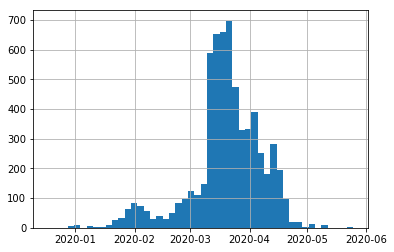

In [398]:
import matplotlib.pyplot as plt
combined_ds['Date Start'].hist(bins=48)
plt.show()

In [399]:
#exclude economics
useful_ef_from_acaps = ef_from_acaps_unique.loc[ef_from_acaps_unique.Keywords!='economic stimulus',:]
print(len(ef_from_acaps_unique))
print(len(useful_ef_from_acaps))

def my_agg(x):
    names = {
        'num_unique_keywords': len(x['Keywords'].value_counts()),
         'num_unique_events': len(x['Keywords'])
    }

    return pd.Series(names, index=['num_unique_keywords','num_unique_events'])


acaps_data_summary = (useful_ef_from_acaps
    .loc[ef_from_acaps_unique.Country.isin(regions_acaps),:]
     .groupby('Country').apply(my_agg).reset_index()
     )

4734
3880


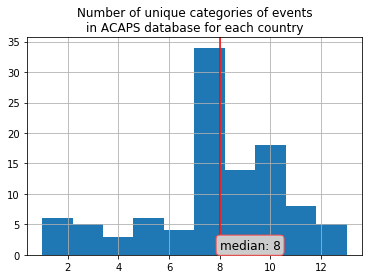

In [400]:
import matplotlib.pyplot as plt

acaps_data_summary.num_unique_keywords.hist()

median_pos = acaps_data_summary.num_unique_keywords.median()
plt.title('Number of unique categories of events\nin ACAPS database for each country')
def plot_median(med_pos):
    plt.axvline(x=med_pos,color='red')
    plt.text(median_pos, 1, 'median: ' + str(int(med_pos)), fontsize=12,
             horizontalalignment='left',
            bbox=dict(boxstyle="round",
                       ec=(1.0, 0.3, 0.3),
                       fc=(0.8, 0.8, 0.8)))
    
plot_median(median_pos)
plt.show()

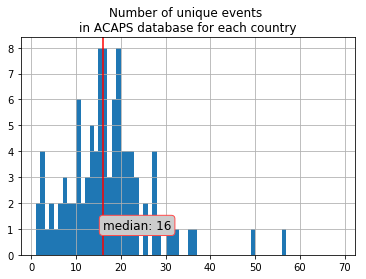

In [401]:
import matplotlib.pyplot as plt

acaps_data_summary.num_unique_events.hist(bins=range(1,70))
plt.title('Number of unique events \nin ACAPS database for each country')
median_pos = acaps_data_summary.num_unique_events.median()
plot_median(median_pos)

plt.show()

#### How does this compare?

In [402]:
ef_regions = ef_cm.Country.unique()
ef_countries = ef_regions[[s.find('US:')!=0 for s in ef_regions]] #exclude US 
len(ef_countries)

96

In [403]:
ef_countries

array(['Austria', 'Germany', 'United Kingdom', 'Vietnam', 'South Korea',
       'Singapore', 'Israel', 'Japan', 'Sweden', 'San Marino', 'Slovenia',
       'Canada', 'Hong Kong', 'Taiwan', 'Macau', 'China', 'United States',
       'European Union', 'Thailand', 'Italy', 'Czechia', 'Australia',
       'Trinidad and Tobago', 'Qatar', 'North Korea', 'New Zealand',
       'Colombia', 'Romania', 'France', 'Portugal', 'Spain', 'Belgium',
       'Luxembourg', 'Albania', 'Andorra', 'Azerbaijan', 'Belarus',
       'Bosnia and Herzegovina', 'Bulgaria', 'Denmark', 'Estonia',
       'Cyprus', 'Croatia', 'Finland', 'Georgia', 'Hungary', 'Latvia',
       'Lithuania', 'Greece', 'Moldova', 'Malta', 'Monaco', 'Netherlands',
       'Iceland', 'Guernsey', 'Macedonia', 'Ireland', 'Vatican City',
       'Jersey', 'Kosovo', 'Kazakhstan', 'Poland', 'Turkey', 'Ukraine',
       'Slovakia', 'Serbia', 'Switzerland', 'Norway', 'Montenegro',
       'Iran', 'Liechtenstein', 'Russia', 'Mexico', 'Egypt', 'Palestine',
 

In [404]:
ef_data_summary = (ef_cm
    .loc[ef_cm.Country.isin(ef_countries),:]
     .groupby('Country').apply(my_agg).reset_index()
     )

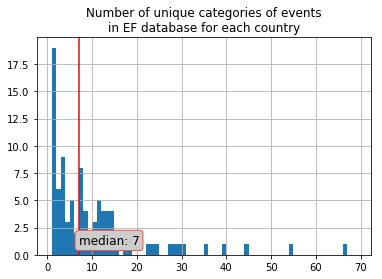

In [405]:
ef_data_summary.num_unique_keywords.hist(bins=range(1,70))
median_pos = ef_data_summary.num_unique_keywords.median()
plt.title('Number of unique categories of events\nin EF database for each country')
plot_median(median_pos)
plt.show()

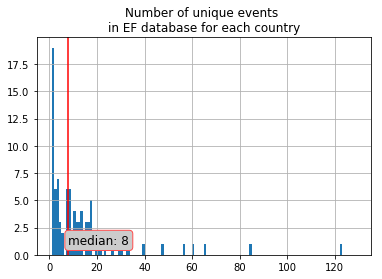

In [406]:
ef_data_summary.num_unique_events.hist(bins=range(1,130))
plt.title('Number of unique events \nin EF database for each country')
median_pos = ef_data_summary.num_unique_events.median()
plot_median(median_pos)

plt.show()

## Is the data high quality?

Let's take a look at the most common categories in the ACAPS to EF data, and based on the full-text description, manuallly judge whether the categorization makes sense. Top 3 are:

 - international travel ban - risk countries	63.0	484.0
 - hospital specialisation - partial	NaN	455.0
 - blanket curfew - no symptoms

In [407]:
from IPython.display import display, Markdown, Latex


def show_sample_of_rows_by_country(keyword,dataset):
    country_sample = np.random.choice(dataset[dataset.Keywords==keyword].Country.unique(),5)
#    print(np.random.choice(ef_from_acaps_unique.Country.unique(),5))
    sample_rows = dataset.loc[
        dataset.Country.isin(country_sample) &
        (dataset.Keywords == keyword),
        :]

    for country in country_sample:
        display(Markdown("#### " + country))
        for rind,row in sample_rows.loc[sample_rows.Country==country,:].iterrows():

            display(Markdown(" - " + row['Description of measure implemented']))
            
def show_sample_of_rows_by_country_acaps(keyword):
    show_sample_of_rows_by_country(keyword,ef_from_acaps_unique)
show_sample_of_rows_by_country_acaps('international travel ban - risk countries')

#### Switzerland

 - Italian citizens without a resident permit in Switerzland are not permitted entering

 - travelers from risk countries are banned from entering, definition of risk countries extended to Italy, Germany, France, Austria. An exeption are people living or working in Switzerland and people who can proof they are just transitting Switzerland

 - Risk country definition extended to Spain (19/03/2020) and non-Schengen area (21/03/2020); leading to them being blocked from entering the country

 - Switzerland has cancelled all visa application processes

 - Closure of several border crossings between Switzerland and Italy

#### Ukraine

 - Ukraine Oleksiy Danilov has said Ukraine will close the border for foreigners in 48 hours for two weeks over the situation with the novel coronavirus in the world.

 - Ukraine temporarily stops issuing visas over coronavirus spread 



 - temporarily bans foreigners from entering Ukraine and terminates regular international passenger service till April 3

#### Egypt

 - All visa interviews, including for Non-Immigrant Visas and Immigrant Visas, have been suspended until further notice.

#### Oman

 - Tourists, for 30 days

 - Stopping entry of cruise ships to the Sultanate’s ports. For 30 days

 - visitors from countries with a high prevalence of COVID-19 will not be allowed to enter the Sultanate.

 - For everyone with the exception of nationals or residents.

 - Suspended issuing new visas until further notice *except for renewal of valid resident visas.

#### Grenada

 - If you are NOT a Grenadian National, and in the last 14 days you have been to Iran, South Korea, China, or anywhere in Europe (including the UK), you will be refused entry into the country. If you are arriving from any other destination, you will be screened upon entry, and quarantined for 14 days.

 -  passengers will not be allowed to disembark from ANY cruise ship on the shores of Grenada, until further notice.

 - the Government of Grenada announces that effective 11:59 p.m. Monday March 23 2020, no crew member of commercial vessels will be allowed or granted “Shore Leave.”

In [408]:
show_sample_of_rows_by_country_acaps('hospital specialisation - partial')

ValueError: 'a' cannot be empty unless no samples are taken

In [ ]:
show_sample_of_rows_by_country_acaps('blanket curfew - no symptoms')

In [ ]:
ef_cm.Keywords.value_counts()[1:50]

In [ ]:
ef_cm.loc[ef_cm.Keywords=='hospital specialisation',: ]

In [ ]:
show_sample_of_rows_by_country('healthcare specialisation - partial', ef_cm)

## Save

In [411]:

combined_ds.to_csv("../../../data/epidemicforecasting/epimodel-covid-data/dataimport/ef_acaps_combined.csv")

In [ ]:
ef_from_acaps_unique.loc[ef_from_acaps_unique.Keywords=='international travel ban - risk countries']

In [409]:
combined_ds.loc[combined_ds['Date Start']=='2020-12-04 00:00:00',:]

,Applies To,Country,DataSource,Date Start,Date end intended,Description of measure implemented,Exceptions,ID,Implementing City,Implementing State/Province,Keyword,Keywords,Quantity,Source,Target city,Target country,Target region,Target state,_merge,confidence


In [410]:
source_data

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source,ADMIN_LEVEL_NAME_MERGEABLE
0,1,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN,
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Introduction / extension of measures,Public health measures,Introduction of isolation and quarantine policies,No,NaN,NaN,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN,Kabul
2,3,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Awareness campaigns,No,NaN,NaN,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN,
3,4,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,12/02/2020,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,14/03/2020,NaN,
4,5,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,12/03/2020,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,14/03/2020,NaN,
5,6,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Movement restrictions,Border closure,No,Closure of borders with Iran,NaN,24/02/2020,Guardian,Media,https://www.theguardian.com/global-development...,14/03/2020,NaN,
6,8,Afghanistan,AFG,Herat,NaN,Asia,Introduction / extension of measures,Social distancing,Schools closure,No,NaN,NaN,01/03/2020,OCHA,UN,https://reliefweb.int/sites/reliefweb.int/file...,14/03/2020,NaN,Herat
7,10,Afghanistan,AFG,Herat,NaN,Asia,Introduction / extension of measures,Social distancing,Limit public gatherings,No,all public gatherings banned,NaN,01/03/2020,OCHA,UN,https://reliefweb.int/sites/reliefweb.int/file...,14/03/2020,NaN,Herat
8,12,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Public health measures,Strengthening the public health system,No,NaN,NaN,01/03/2020,OCHA,UN,https://reliefweb.int/sites/reliefweb.int/file...,14/03/2020,NaN,
9,17,Afghanistan,AFG,NaN,NaN,Asia,Introduction / extension of measures,Governance and socio-economic measures,Limit product imports/exports,No,Food imports from Iran and Afghanistan has bee...,NaN,01/03/2020,US Embassy,Government,https://af.usembassy.gov/covid-19-information/,14/03/2020,NaN,
